In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling
import missingno as msno
from IPython.display import Markdown

## Importing App Store Game Data

In [2]:
df = pd.read_csv('appstore_games.csv')
df.head()

URL         ID  \
0   https://apps.apple.com/us/app/sudoku/id284921427  284921427   
1  https://apps.apple.com/us/app/reversi/id284926400  284926400   
2  https://apps.apple.com/us/app/morocco/id284946595  284946595   
3  https://apps.apple.com/us/app/sudoku-free/id28...  285755462   
4  https://apps.apple.com/us/app/senet-deluxe/id2...  285831220   

            Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                                         Description  \
0  Join over 21,000,000 of our fans and download ...   
1  The classic game of Reversi, also known as Oth...   
2  Play the classic strategy game Othello (also k...   
3  Top 100 free app for over a year.\nRated "Best...   
4  "Senet Deluxe - The Ancient Game of Life and A...   

                  Developer Age Rating  \
0  Mighty Mighty Good Games         4+   
1          Kiss The Machine         4+   
2               Bayou Games         4+   
3  Mighty Mighty Good Games         4+   
4           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary Genre                             Genres Original Release Date  \
0         Games            Games, Strategy, Puzzle            11/07/2008   
1         Games             Games, Strategy, Board            11/07/2008   
2         Games             Games, Board, Strategy            11/07/2008   
3         Games            Games, Strategy, Puzzle            23/07/2008   
4         Games  Games, Strategy, Board, Education            18/07/2008   

  Current Version Release Date  
0                   30/05/2017  
1                   17/05/2018  
2                    5/09/2017  
3                   30/05/2017  
4                   22/07/2018

## Checking for null values

In [3]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


URL                              0.00
ID                               0.00
Name                             0.00
Subtitle                        69.07
Icon URL                         0.00
Average User Rating             55.54
User Rating Count               55.54
Price                            0.14
In-app Purchases                54.82
Description                      0.00
Developer                        0.00
Age Rating                       0.00
Languages                        0.35
Size                             0.01
Primary Genre                    0.00
Genres                           0.00
Original Release Date            0.00
Current Version Release Date     0.00
dtype: float64

## Data descriptive statistics

In [4]:
df.describe()

ID  Average User Rating  User Rating Count         Price  \
count  1.700700e+04          7561.000000       7.561000e+03  16983.000000   
mean   1.059614e+09             4.060905       3.306531e+03      0.813419   
std    2.999676e+08             0.751428       4.232256e+04      7.835732   
min    2.849214e+08             1.000000       5.000000e+00      0.000000   
25%    8.996543e+08             3.500000       1.200000e+01      0.000000   
50%    1.112286e+09             4.500000       4.600000e+01      0.000000   
75%    1.286983e+09             4.500000       3.090000e+02      0.000000   
max    1.475077e+09             5.000000       3.032734e+06    179.990000   

               Size  
count  1.700600e+04  
mean   1.157064e+08  
std    2.036477e+08  
min    5.132800e+04  
25%    2.295014e+07  
50%    5.676895e+07  
75%    1.330271e+08  
max    4.005591e+09

## Structure of Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

## Pandas Profiling

In [6]:
#Using pandas profiling tool for a starting EDA
pandas_profiling.ProfileReport(df)

In [7]:
df.shape

(17007, 18)

In [8]:
df.drop(['URL', 'ID'], axis = 1, inplace = True)

In [9]:
df.head()

Name Subtitle                                           Icon_URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average_User_Rating  User_Rating_Count  Price In-app_Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                                         Description  \
0  Join over 21,000,000 of our fans and download ...   
1  The classic game of Reversi, also known as Oth...   
2  Play the classic strategy game Othello (also k...   
3  Top 100 free app for over a year.\nRated "Best...   
4  "Senet Deluxe - The Ancient Game of Life and A...   

                  Developer Age_Rating  \
0  Mighty Mighty Good Games         4+   
1          Kiss The Machine         4+   
2               Bayou Games         4+   
3  Mighty Mighty Good Games         4+   
4           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary_Genre                             Genres Original_Release_Date  \
0         Games            Games, Strategy, Puzzle            11/07/2008   
1         Games             Games, Strategy, Board            11/07/2008   
2         Games             Games, Board, Strategy            11/07/2008   
3         Games            Games, Strategy, Puzzle            23/07/2008   
4         Games  Games, Strategy, Board, Education            18/07/2008   

  Current_Version_Release_Date  
0                   30/05/2017  
1                   17/05/2018  
2                    5/09/2017  
3                   30/05/2017  
4                   22/07/2018

## Analysing Missing Values in Variables

**Visualization of missing variable**

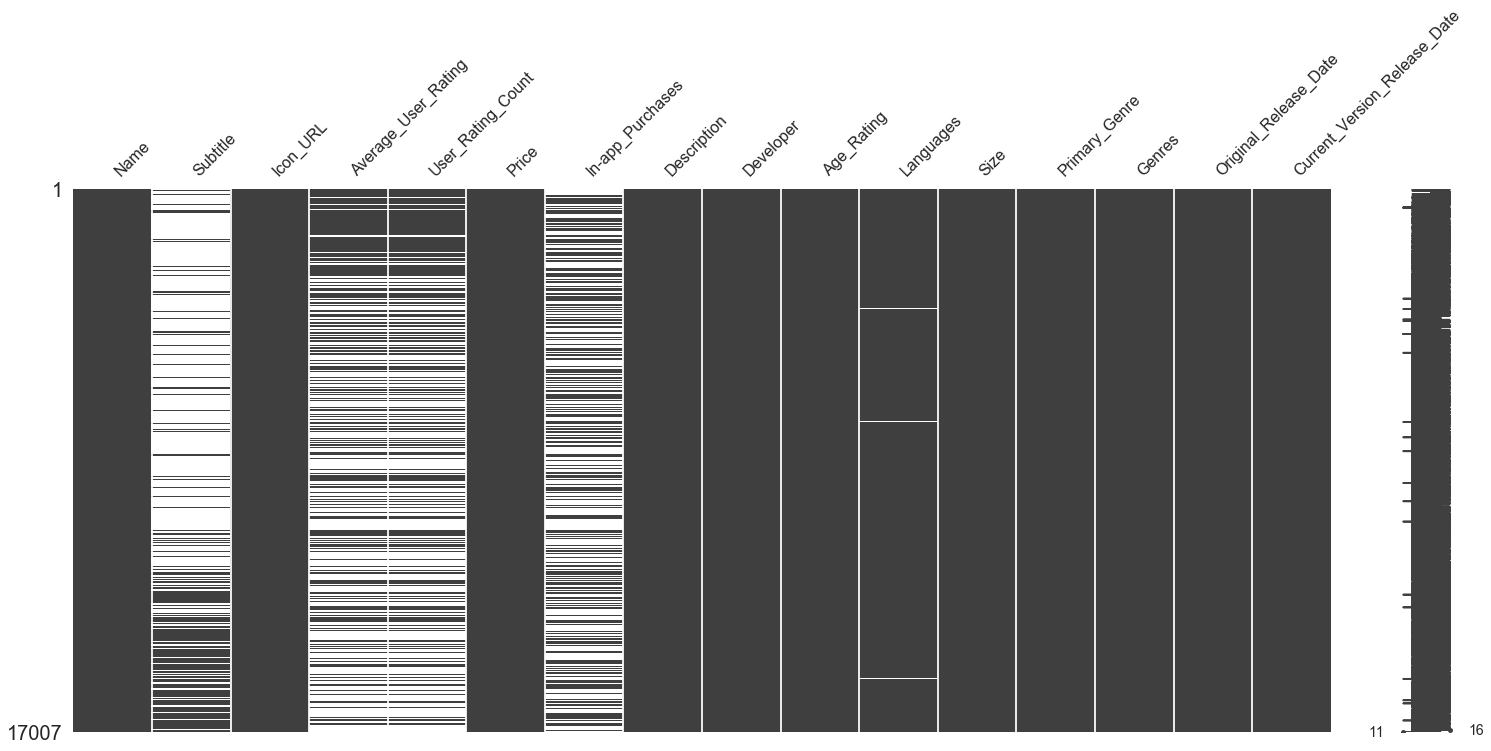

In [10]:
display(Markdown("**Visualization of missing variable**"))
msno.matrix(df)
plt.show()

## Extracting Icons for games on App store

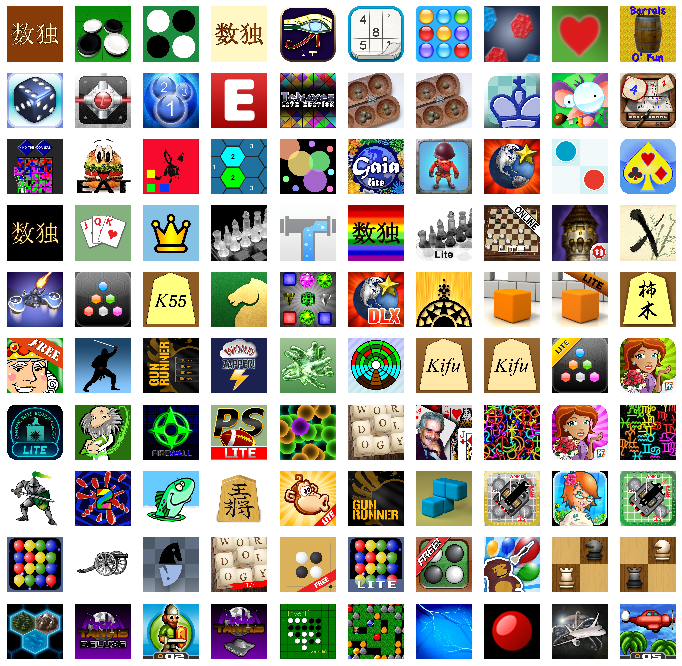

Wall time: 23.5 s


In [11]:
%%time

import requests
from PIL import Image
from io import BytesIO

fig, ax = plt.subplots(10,10, figsize=(12,12))

for i in range(100):
    r = requests.get(df['Icon_URL'][i])
    im = Image.open(BytesIO(r.content))
    ax[i//10][i%10].imshow(im)
    ax[i//10][i%10].axis('off')
plt.show()

## Average User Rating Count

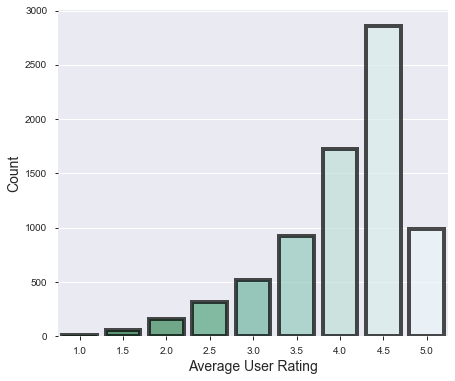

In [12]:
plt.rcParams['figure.figsize'] = (7, 6)
ax = sns.countplot(data = df, x ='Average_User_Rating', palette = 'BuGn_r', alpha = 0.7, linewidth=4, edgecolor= 'black')
ax.set_ylabel('Count', fontsize = 14)
ax.set_xlabel('Average User Rating', fontsize = 14)
plt.show()

## Price and Average User Rating Comparison

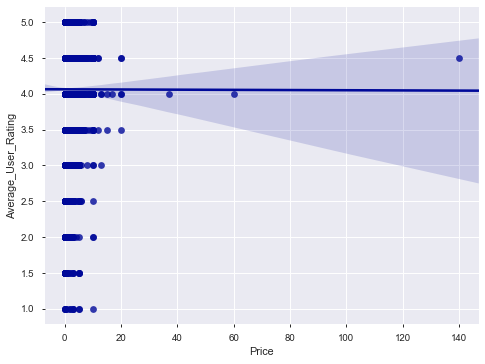

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8, 6), dpi=70)
sns.regplot(data=df, x='Price', y='Average_User_Rating', ax=ax, color = '#000999')
plt.show()

## Correlation Plot and Graph of Correlation for Genre List

In [14]:
df['GenreList'] = df['Genres'].apply(lambda s : s.replace('Games','').replace('&',' ').replace(',', ' ').split()) 
df['GenreList'].head()

0              [Strategy, Puzzle]
1               [Strategy, Board]
2               [Board, Strategy]
3              [Strategy, Puzzle]
4    [Strategy, Board, Education]
Name: GenreList, dtype: object

In [15]:
gameTypes = []
for i in df['GenreList']: 
    gameTypes += i
gameTypes = set(gameTypes)
print("There are {} types in the Game Dataset".format(len(set(gameTypes))))

There are 56 types in the Game Dataset


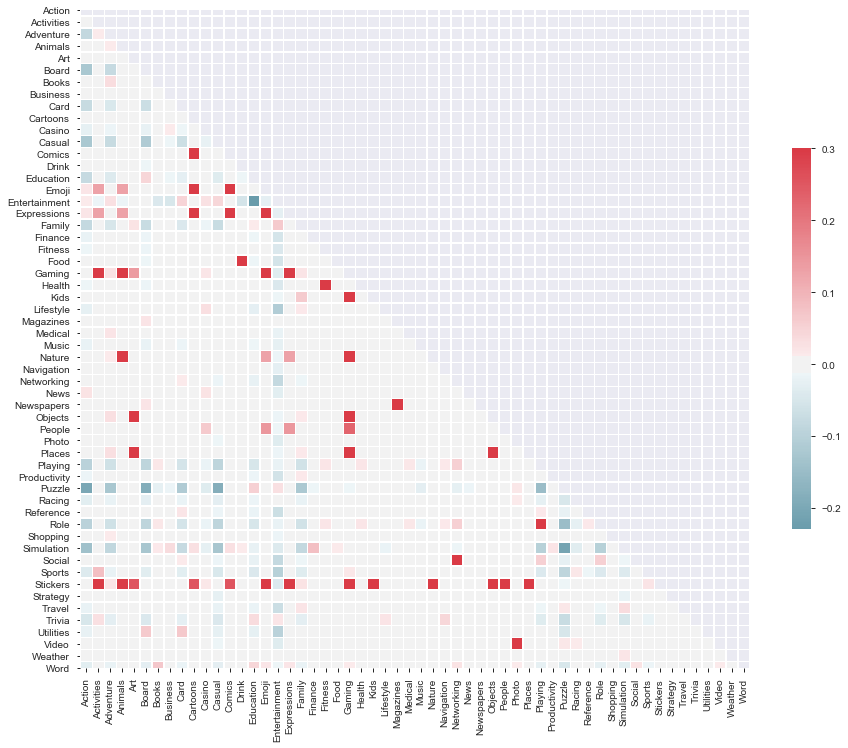

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer 

test = df['GenreList']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

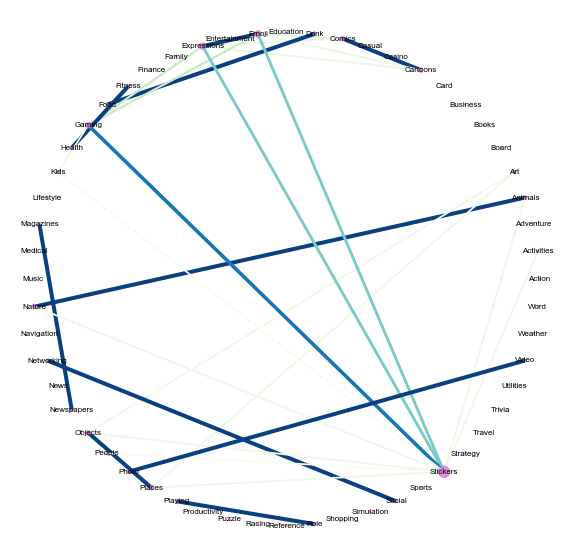

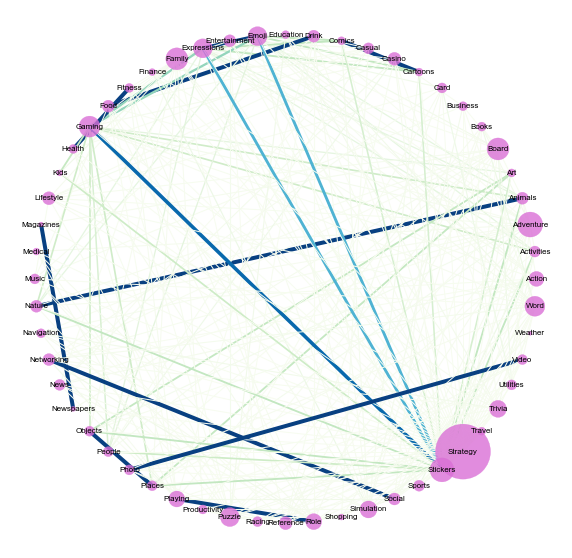

In [20]:
import networkx as nx

stocks = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: stocks[x])
G.edges(data=True)

def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)
    
    
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 
    
create_corr_network(G, 'positive', 0.3)
create_corr_network(G, 'positive', -0.3)

## Top 20 Genres

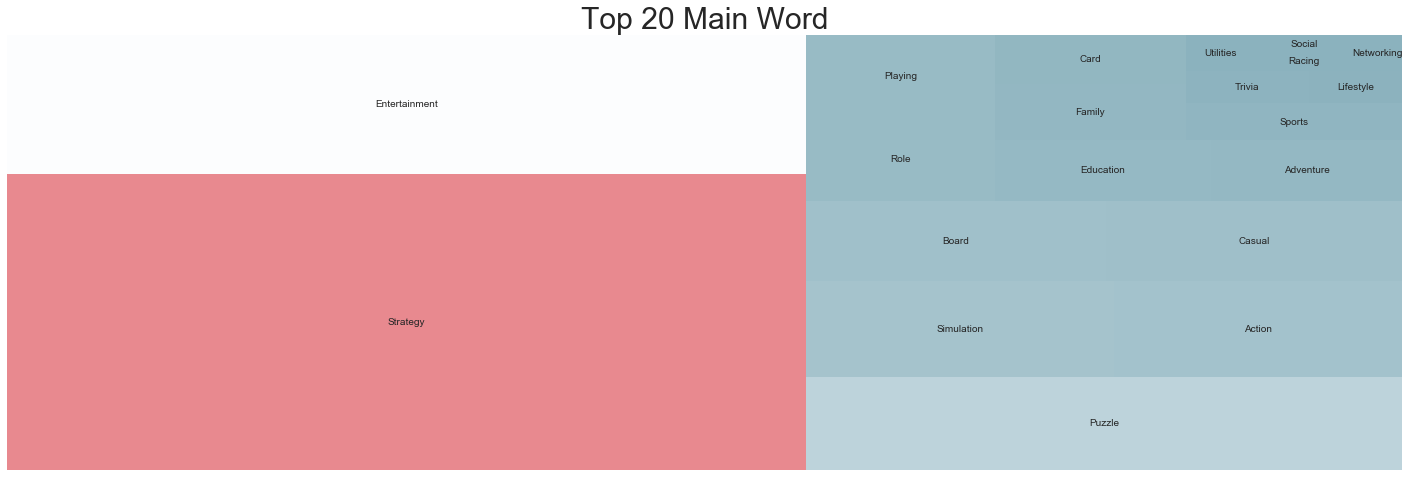

In [21]:
import squarify
y = res.apply(sum).sort_values(ascending=False)[:20]
    
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(25, 8)


norm = matplotlib.colors.Normalize(vmin=min(y), vmax=max(y))
#colors = [matplotlib.cm.Blues(norm(value)) for value in y]
colors = [cmap(norm(value)) for value in y]
colors[1] = "#FBFCFE"

squarify.plot(sizes = y.values, label = y.index, color = colors, alpha=.6)
plt.title('Top 20 Main Word', fontsize = 30)
plt.axis('off')
plt.show()

**Comparison with Average_User_Rating**

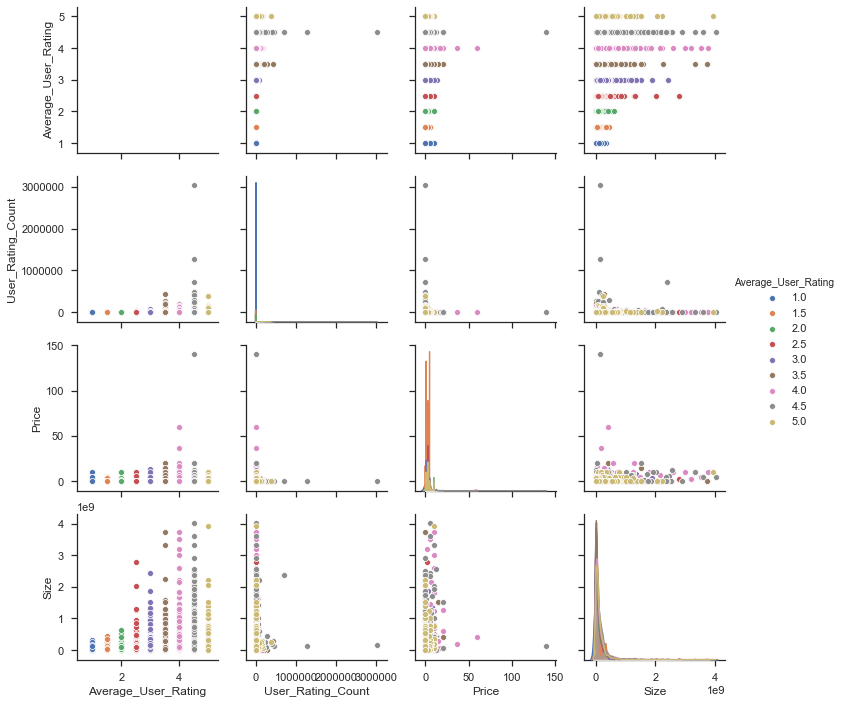

In [22]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="Average_User_Rating")

## Bokeh Plot for size and original_release_date

In [23]:
from bokeh.plotting import figure, output_notebook
from bokeh.io import show
df['Original_Release_Date'] = pd.to_datetime(df['Original_Release_Date'], format = '%d/%m/%Y')
date_size = pd.DataFrame({'size':df['Size']})
date_size = date_size.set_index(df['Original_Release_Date'])
date_size = date_size.sort_values(by=['Original_Release_Date'])
date_size['size'] = date_size['size'].apply(lambda b : b//(2**10))
fig = figure(x_axis_type='datetime',           
             plot_height=250, plot_width=750,
             title='Date vs App Size')
fig.line(y='size', x='Original_Release_Date', source=date_size)
show(fig)

## Size and Average_User_Rating Analysis

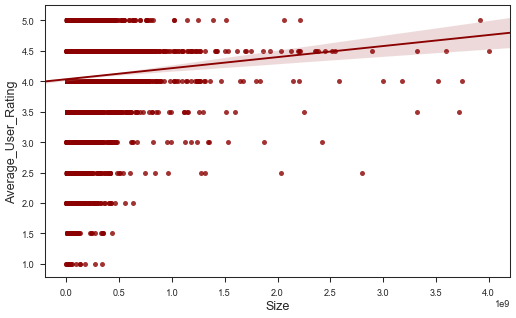

In [24]:
plt.figure(figsize=(10,6), dpi= 60)
ax = sns.regplot(data=df, x='Size', y='Average_User_Rating', color = 'darkred')
ax.set_ylabel('Average_User_Rating', fontsize = 15)
ax.set_xlabel('Size', fontsize = 15)
plt.show()

## Size and Original_Release_Date Analysis

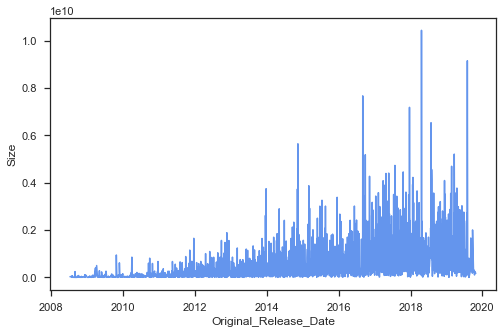

In [25]:
df["Original_Release_Date"] = pd.to_datetime(df["Original_Release_Date"])
df["year"] = df["Original_Release_Date"].dt.year

plt.rcParams['figure.figsize'] = (8,5)
temp_df = df.groupby(['Original_Release_Date']).Size.sum().reset_index()
ax = sns.lineplot(data = temp_df, x = 'Original_Release_Date', y = 'Size', color = 'cornflowerblue')
plt.xlabel('Original_Release_Date')
plt.ylabel('Size')
plt.show()

## App Price Analysis

In [26]:
# categorizing price
df["Price Range"] = df["Price"].dropna().map(lambda x: "Free" if x == 0.00 else("Low Price" if 0.99 <= x <= 4.99 else("Medium Price" if 5.99 <= x <= 19.99 else "High Price")))
df["Price Range"].value_counts()

Free            14212
Low Price        2464
Medium Price      270
High Price         37
Name: Price Range, dtype: int64

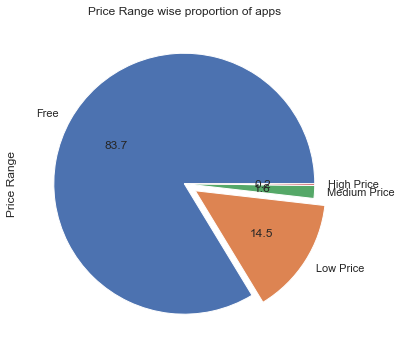

In [27]:
df["Price Range"].dropna().value_counts().plot.pie(autopct="%1.1f", explode=[0,0.1,0,0], figsize=(6,6))
plt.title("Price Range wise proportion of apps")
plt.show()

## App Age-Rating Analysis

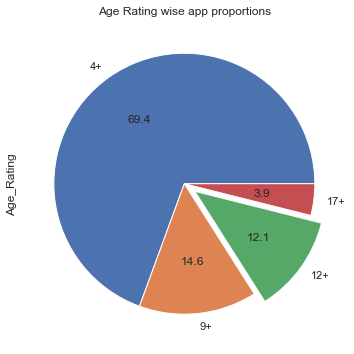

In [30]:
df["Age_Rating"].value_counts().plot.pie(autopct="%1.1f", explode=[0,0,0.1,0], figsize=(6,6))
plt.title("Age Rating wise app proportions")
plt.show()

## Top 10 Languages

In [61]:
lang1 = df['Languages'].apply(lambda s : str(s).replace(',',' ').replace('/n','').replace('&','').split())
#df['languagelist'] = df['Languages'].apply(lambda s : str(s).replace('&',' '))                                           

In [103]:
lang2
lang3 = sum(lang2,[])
lang3

['DA',
 'NL',
 'EN',
 'FI',
 'FR',
 'DE',
 'IT',
 'JA',
 'KO',
 'NB',
 'PL',
 'PT',
 'RU',
 'ZH',
 'ES',
 'SV',
 'ZH',
 'EN',
 'EN',
 'DA',
 'NL',
 'EN',
 'FI',
 'FR',
 'DE',
 'IT',
 'JA',
 'KO',
 'NB',
 'PL',
 'PT',
 'RU',
 'ZH',
 'ES',
 'SV',
 'ZH',
 'DA',
 'NL',
 'EN',
 'FR',
 'DE',
 'EL',
 'IT',
 'JA',
 'KO',
 'NO',
 'PT',
 'RU',
 'ZH',
 'ES',
 'SV',
 'EN',
 'nan',
 'EN',
 'FR',
 'EN',
 'EN',
 'EN',
 'EN',
 'EN',
 'EN',
 'EN',
 'FR',
 'DE',
 'IT',
 'ES',
 'EN',
 'FR',
 'DE',
 'IT',
 'ES',
 'EN',
 'EN',
 'EN',
 'EN',
 'EN',
 'EN',
 'FR',
 'EN',
 'FR',
 'EN',
 'EN',
 'EN',
 'EN',
 'EN',
 'FR',
 'DE',
 'EL',
 'PT',
 'RU',
 'ZH',
 'ES',
 'EN',
 'DA',
 'NL',
 'EN',
 'FI',
 'FR',
 'DE',
 'IT',
 'JA',
 'KO',
 'NB',
 'PL',
 'PT',
 'RU',
 'ZH',
 'ES',
 'SV',
 'ZH',
 'EN',
 'EN',
 'FR',
 'DE',
 'IT',
 'ES',
 'EN',
 'FR',
 'DE',
 'JA',
 'KO',
 'ZH',
 'EN',
 'DA',
 'NL',
 'EN',
 'FI',
 'FR',
 'DE',
 'IT',
 'JA',
 'KO',
 'NB',
 'PL',
 'PT',
 'RU',
 'ZH',
 'ES',
 'SV',
 'ZH',
 'EN',
 'FR',
 'DE'

In [104]:
from collections import Counter

In [105]:
language_dict = Counter(lang3)

In [106]:
lang_d2 = dict(language_dict.most_common())

In [107]:
lang_d2

{'EN': 16834,
 'ZH': 4989,
 'DE': 2599,
 'FR': 2526,
 'ES': 2420,
 'JA': 2364,
 'RU': 2179,
 'IT': 1996,
 'PT': 1921,
 'KO': 1919,
 'TR': 1357,
 'NL': 1283,
 'PL': 1152,
 'SV': 1127,
 'CS': 887,
 'DA': 749,
 'TH': 744,
 'ID': 688,
 'NB': 684,
 'FI': 668,
 'EL': 645,
 'VI': 619,
 'MS': 573,
 'HE': 522,
 'AR': 513,
 'HU': 444,
 'RO': 426,
 'SK': 402,
 'CA': 371,
 'UK': 365,
 'HR': 133,
 'HI': 132,
 'FA': 81,
 'BG': 64,
 'nan': 60,
 'BN': 50,
 'NO': 49,
 'SL': 49,
 'TA': 49,
 'KN': 47,
 'MR': 46,
 'GU': 42,
 'LV': 38,
 'TE': 36,
 'HY': 36,
 'ML': 35,
 'SR': 33,
 'PA': 31,
 'LT': 23,
 'UR': 19,
 'TL': 18,
 'AF': 13,
 'NN': 13,
 'ET': 12,
 'MK': 12,
 'SQ': 11,
 'SE': 11,
 'BE': 9,
 'AZ': 8,
 'KA': 8,
 'IS': 8,
 'NE': 8,
 'GA': 7,
 'EU': 7,
 'GL': 7,
 'SI': 7,
 'SW': 7,
 'MY': 7,
 'MN': 7,
 'BS': 6,
 'KM': 6,
 'LO': 6,
 'AM': 5,
 'ZU': 5,
 'KK': 4,
 'UZ': 4,
 'LA': 4,
 'CY': 4,
 'PS': 3,
 'AS': 3,
 'KS': 3,
 'OR': 3,
 'OM': 3,
 'SA': 3,
 'SD': 3,
 'SO': 3,
 'BO': 3,
 'EO': 3,
 'TG': 2,
 'TK'

In [115]:
l1_lang = list(lang_d2.keys())
l2_count = list(lang_d2.values())

l31 = pd.DataFrame(l1_lang[0:20],columns = ['Languages'])
l41 = pd.DataFrame(l2_count[0:20],columns = ['Count'])

l51 = pd.concat([l31,l41],axis=1)

In [116]:
l51

Languages  Count
0         EN  16834
1         ZH   4989
2         DE   2599
3         FR   2526
4         ES   2420
5         JA   2364
6         RU   2179
7         IT   1996
8         PT   1921
9         KO   1919
10        TR   1357
11        NL   1283
12        PL   1152
13        SV   1127
14        CS    887
15        DA    749
16        TH    744
17        ID    688
18        NB    684
19        FI    668

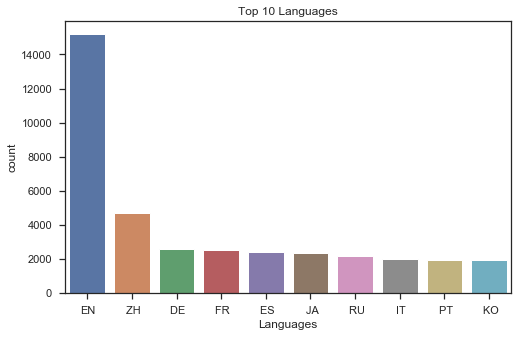

In [123]:
Languages = pd.DataFrame(df['Languages'].str.split(',', expand=True).values.ravel(), columns=['Languages'])
sns.countplot(x='Languages', data=Languages, order=pd.value_counts(Languages['Languages']).iloc[:10].index).set_title("Top 10 Languages");

## Most Reviewed & Popular Games

In [16]:
review = df.sort_values(by='User_Rating_Count', ascending=False)[['Name', 'Price', 'Average_User_Rating', 'Size', 'User_Rating_Count', 'Icon_URL']].head(10)
review.iloc[:, 0:-1]

Name  Price  Average_User_Rating  \
1378                   Clash of Clans    0.0                  4.5   
7187                     Clash Royale    0.0                  4.5   
13414                     PUBG MOBILE    0.0                  4.5   
1921       Plants vs. Zombies\u2122 2    0.0                  4.5   
8139                    Pok\xe9mon GO    0.0                  3.5   
2410                       Boom Beach    0.0                  4.5   
12473  Cash, Inc. Fame & Fortune Game    0.0                  5.0   
8632   Idle Miner Tycoon: Cash Empire    0.0                  4.5   
38                         TapDefense    0.0                  3.5   
3550       Star Wars\u2122: Commander    0.0                  4.5   

               Size  User_Rating_Count  
1378   1.612196e+08          3032734.0  
7187   1.451080e+08          1277095.0  
13414  2.384082e+09           711409.0  
1921   1.207634e+08           469562.0  
8139   2.815212e+08           439776.0  
2410   2.027858e+08           400787.0  
12473  2.459576e+08           374772.0  
8632   4.439747e+08           283035.0  
38     7.774384e+06           273687.0  
3550   1.230838e+08           259030.0

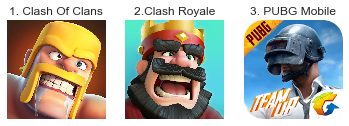

In [17]:
import urllib.request
from PIL import Image

plt.figure(figsize=(6,3))
plt.subplot(131)
image = Image.open(urllib.request.urlopen(review.iloc[0,-1]))
plt.title('1. Clash Of Clans')
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open(urllib.request.urlopen(review.iloc[1,-1]))
plt.title('2.Clash Royale')
plt.imshow(image)
plt.axis('off')

plt.subplot(133)
image = Image.open(urllib.request.urlopen(review.iloc[2,-1]))
plt.title('3. PUBG Mobile')
plt.imshow(image)
plt.axis('off')

plt.show()

## Best Overall Game in App Store

In [18]:
best = df.sort_values(by=['Average_User_Rating', 'User_Rating_Count'], ascending=False)[['Name', 'Average_User_Rating', 'User_Rating_Count', 'Size', 
                                                                                         'Price', 'Icon_URL']].head(10)
best.iloc[:, 0:-1]

Name  Average_User_Rating  \
12473     Cash, Inc. Fame & Fortune Game                  5.0   
6089                           Egg, Inc.                  5.0   
14155                          AFK Arena                  5.0   
8388   South Park: Phone Destroyer\u2122                  5.0   
13261         From Zero to Hero: Cityman                  5.0   
15266                     Sushi Bar Idle                  5.0   
10418                 Fire Emblem Heroes                  5.0   
1649                         Bloons TD 5                  5.0   
872                        Naval Warfare                  5.0   
16434                Idle Roller Coaster                  5.0   

       User_Rating_Count         Size  Price  
12473           374772.0  245957632.0   0.00  
6089            174591.0   74891264.0   0.00  
14155           156766.0  225711104.0   0.00  
8388            156044.0  130186240.0   0.00  
13261           146729.0  296638464.0   0.00  
15266           123606.0  257325056.0   0.00  
10418           120283.0  175634432.0   0.00  
1649             97776.0  133326848.0   2.99  
872              90214.0   43198464.0   0.00  
16434            88855.0  234342400.0   0.00

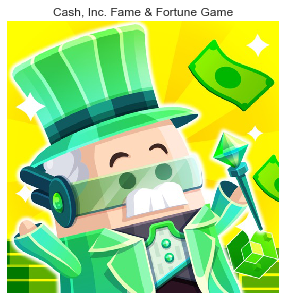

In [19]:
plt.figure(figsize=(5,5))
image = Image.open(urllib.request.urlopen(best.iloc[0, -1]))
plt.axis('off')
plt.title('Cash, Inc. Fame & Fortune Game')
plt.imshow(image)
plt.show()

## In-App Purchase Analysis

In [128]:
# splitting the string into float values and storing them as a list
df["In-app_Purchases"] = df["In-app_Purchases"].dropna().map(lambda x: list(float(i) for i in x.split(", ")))

In [139]:
df["Total In-app Purchases"] = df["In-app_Purchases"].dropna().map(lambda x:sum(x))
df["Total In-app Purchases"].dropna().value_counts().head()

0.99    945
2.99    608
1.99    562
4.99    154
1.98    142
Name: Total In-app Purchases, dtype: int64

## Wordcloud

Text(0.5, 1.0, 'Wordcloud(Subtitle)')

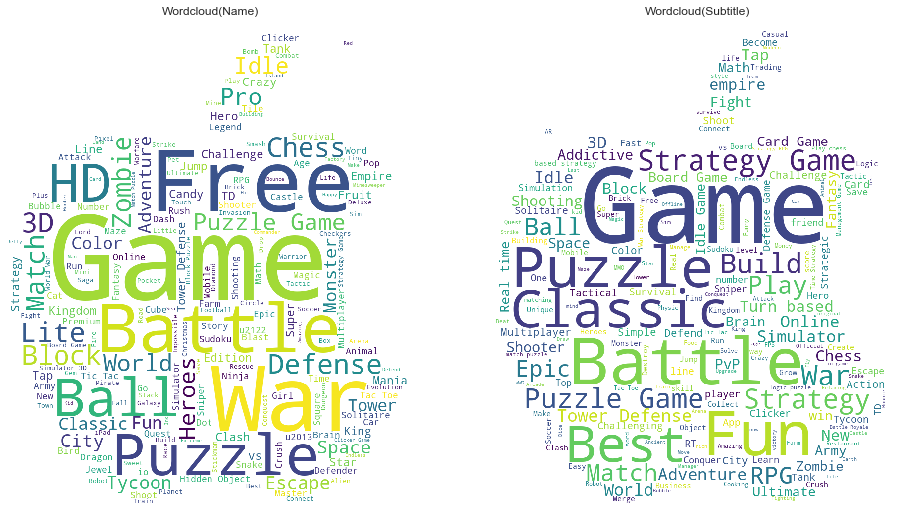

In [148]:
mask = np.array(Image.open('mask.png'))
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',mask = mask,width=800, height=800).generate(' '.join(df['Name']))
wordcloud_sub = WordCloud(background_color='white',mask = mask,width=800, height=800).generate(' '.join(df['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')


In [150]:
df1 = df[df['Average_User_Rating'] > 4]

Text(0.5, 1.0, 'Wordcloud(Description)')

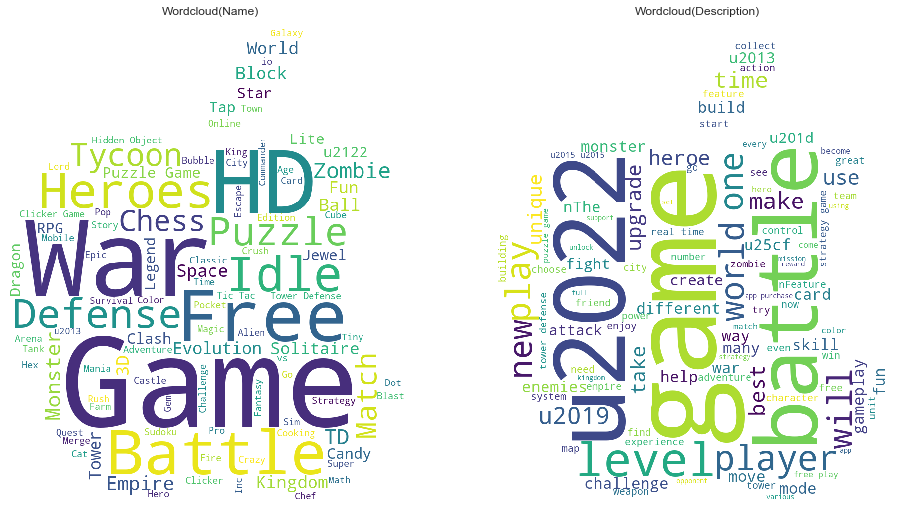

In [168]:
mask = np.array(Image.open('mask.png'))
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',max_words=100, mask = mask,width=800, height=800).generate(' '.join(df1['Name']))
wordcloud_sub = WordCloud(background_color='white',max_words=100,mask = mask,width=800, height=800).generate(' '.join(df1['Description'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Description)')

In [152]:
df2 = df[df['Average_User_Rating'] < 4]

Text(0.5, 1.0, 'Wordcloud(Description)')

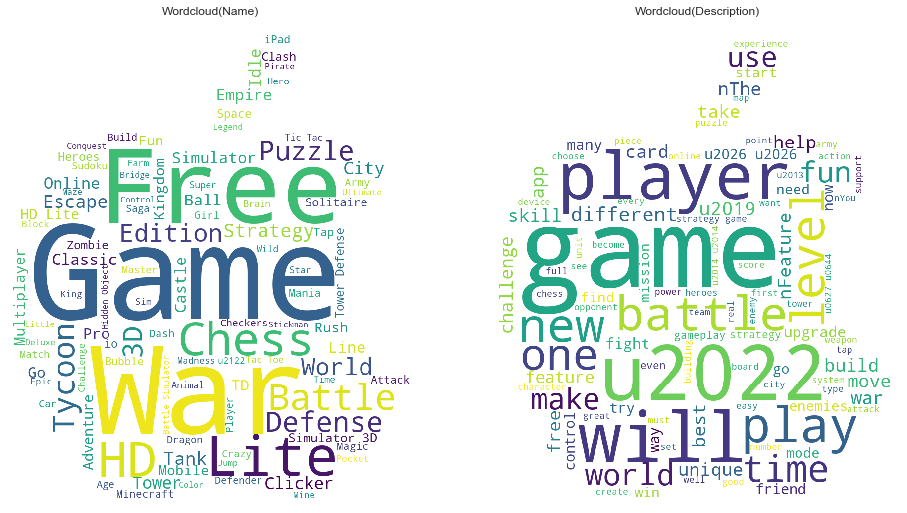

In [169]:
mask = np.array(Image.open('mask.png'))
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',max_words=100, mask = mask,width=800, height=800).generate(' '.join(df2['Name']))
wordcloud_sub = WordCloud(background_color='white',max_words=100,mask = mask,width=800, height=800).generate(' '.join(df2['Description'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Description)')